# Storytelling-Case-Study-Airbnb

## Problem Statement

Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

 

The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

1. Which type of hosts to acquire more and where?
2. The categorisation of customers based on their preferences.
3. What are the neighbourhoods they need to target?
4. What is the pricing ranges preferred by customers?
5. The various kinds of properties that exist w.r.t. customer preferences.
6. Adjustments in the existing properties to make it more customer-oriented.
7. What are the most popular localities and properties in New York currently?
8. How to get unpopular properties more traction? and so on

### Step 1: Import libraries and read the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Remove warnings in kernel while running a cell
import warnings
warnings.filterwarnings('ignore')

#notebook setting to display all the rowns and columns .
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# Read the dataset
airbnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
# View the data
airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


### Step 2: Review and inspect the data

In [4]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
airbnb_df.shape

(48895, 16)

In [6]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Step 3: Binning Continuous variables (as suggested)

In [7]:
airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


#### 3.1 - Categorizing the "price" column into 5 categories

In [8]:
airbnb_df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: >

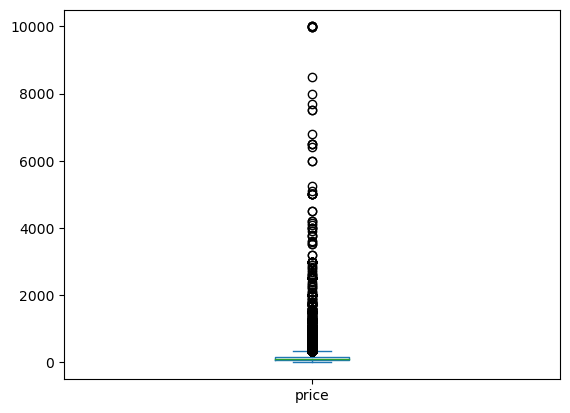

In [9]:
airbnb_df.price.plot.box()

In [10]:
airbnb_df[airbnb_df.price == 0].shape

(11, 16)

In [11]:
airbnb_df.price.value_counts()

price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

In [12]:
def price_categories_fn(val):
    """
    Categorizes the "price" column into 5 categories
    """
    if val <= 10:
        return 'very Low'
    elif val <= 20:
        return 'Low'
    elif val <= 50 :
        return 'Medium'
    elif (val <= 100):
        return 'High'
    else:
        return 'very High'

In [13]:
airbnb_df['price_categories'] = airbnb_df.price.map(price_categories_fn)
airbnb_df['price_categories']

0        very High
1        very High
2        very High
3             High
4             High
           ...    
48890         High
48891       Medium
48892    very High
48893         High
48894         High
Name: price_categories, Length: 48895, dtype: object

In [14]:
airbnb_df['price_categories'].value_counts()

price_categories
very High    24967
High         17367
Medium        6474
Low             59
very Low        28
Name: count, dtype: int64

#### 3.2 categorizing the "minimum_nights" column into 5 categories

In [15]:
airbnb_df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [16]:
airbnb_df.minimum_nights.value_counts()

minimum_nights
1       12720
2       11696
3        7999
30       3760
4        3303
5        3034
7        2058
6         752
14        562
10        483
29        340
15        279
20        223
28        203
31        201
21        135
8         130
60        106
90        104
12         91
25         82
9          80
13         54
180        43
11         33
45         32
365        29
120        28
18         28
16         18
27         17
26         16
100        15
35         15
24         14
17         14
50         14
40         13
80          9
19          8
32          8
22          8
23          8
70          8
59          6
300         6
150         6
360         5
500         5
200         4
75          4
55          4
999         3
62          3
91          3
110         3
240         3
93          2
160         2
47          2
88          2
105         2
33          2
53          2
115         2
181         2
210         2
270         2
44          2
133         2
56   

In [17]:
def minimum_night_categories_fn(val):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if val <= 1:
        return 'very Low'
    elif val <= 3:
        return 'Low'
    elif val <= 5 :
        return 'Medium'
    elif (val <= 10):
        return 'High'
    else:
        return 'very High'

In [18]:
airbnb_df['minimum_night_categories'] = airbnb_df.minimum_nights.map(minimum_night_categories_fn)
airbnb_df['minimum_night_categories']

0        very Low
1        very Low
2             Low
3        very Low
4            High
           ...   
48890         Low
48891      Medium
48892        High
48893    very Low
48894        High
Name: minimum_night_categories, Length: 48895, dtype: object

In [19]:
airbnb_df['minimum_night_categories'].value_counts()

minimum_night_categories
Low          19695
very Low     12720
very High     6640
Medium        6337
High          3503
Name: count, dtype: int64

#### 3.3 categorizing the "number_of_reviews" column into 5 categories

In [20]:
airbnb_df.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [21]:
airbnb_df.number_of_reviews.value_counts()

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
5       1618
6       1357
7       1179
8       1127
9        964
10       803
11       778
12       682
13       611
14       575
15       536
16       471
17       461
18       417
19       401
20       391
22       344
23       337
21       333
25       313
24       305
26       299
28       258
27       253
29       244
32       243
30       227
31       223
33       209
38       205
35       196
34       193
42       192
36       192
37       188
39       167
45       158
41       155
43       154
51       143
48       139
52       137
40       134
49       133
59       131
47       129
54       127
46       124
50       122
44       121
57       111
55       109
58       107
53       106
68       105
62       102
61        99
67        98
70        98
56        98
63        93
64        93
60        92
77        91
72        89
66        85
75        80
73        79
76        79
69        79
74     

In [22]:
def number_of_reviews_categories_fn(val):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if val <= 1:
        return 'very Low'
    elif val <= 5:
        return 'Low'
    elif val <= 15 :
        return 'Medium'
    elif (val <= 50):
        return 'High'
    else:
        return 'very High'

In [23]:
airbnb_df['number_of_reviews_categories'] = airbnb_df.number_of_reviews.map(number_of_reviews_categories_fn)
airbnb_df['number_of_reviews_categories']

0           Medium
1             High
2         very Low
3        very High
4           Medium
           ...    
48890     very Low
48891     very Low
48892     very Low
48893     very Low
48894     very Low
Name: number_of_reviews_categories, Length: 48895, dtype: object

In [24]:
airbnb_df['number_of_reviews_categories'].value_counts()

number_of_reviews_categories
very Low     15296
Low           9597
Medium        8612
High          8431
very High     6959
Name: count, dtype: int64

#### 3.4 categorizing the "reviews_per_month" column into 5 categories

In [25]:
airbnb_df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [26]:
airbnb_df.reviews_per_month.value_counts()

reviews_per_month
0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
9.53       1
9.74       1
6.06       1
8.25       1
10.54      1
Name: count, Length: 937, dtype: int64

In [27]:
def reviews_per_month_fn(val):
    """
    Categorizes the "reviews_per_month" column into 5 categories
    """
    if val <= 0.02:
        return 'very Low'
    elif val <= 0.05:
        return 'Low'
    elif val <= 2 :
        return 'Medium'
    elif (val <= 5):
        return 'High'
    else:
        return 'very High'

In [28]:
airbnb_df['reviews_per_month_categories'] = airbnb_df.reviews_per_month.map(reviews_per_month_fn)
airbnb_df['reviews_per_month_categories']

0           Medium
1           Medium
2        very High
3             High
4           Medium
           ...    
48890    very High
48891    very High
48892    very High
48893    very High
48894    very High
Name: reviews_per_month_categories, Length: 48895, dtype: object

In [29]:
airbnb_df['reviews_per_month_categories'].value_counts()

reviews_per_month_categories
Medium       25765
very High    11519
High          8298
Low           2352
very Low       961
Name: count, dtype: int64

#### 3.5 categorizing the "calculated_host_listings_count" column into 5 categories

In [30]:
airbnb_df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [31]:
airbnb_df.calculated_host_listings_count.value_counts()

calculated_host_listings_count
1      32303
2       6658
3       2853
4       1440
5        845
6        570
8        416
7        399
327      327
9        234
232      232
10       210
96       192
12       180
13       130
121      121
11       110
52       104
103      103
33        99
49        98
91        91
87        87
15        75
14        70
23        69
34        68
17        68
65        65
31        62
28        56
18        54
25        50
50        50
47        47
43        43
20        40
39        39
37        37
32        32
30        30
29        29
27        27
26        26
21        21
19        19
16        16
Name: count, dtype: int64

In [32]:
def calculated_host_listings_count_fn(val):
    """
    Categorizes the "calculated_host_listings_count" column into 5 categories
    """
    if val <= 1:
        return 'very Low'
    elif val <= 3:
        return 'Low'
    elif val <= 5 :
        return 'Medium'
    elif (val <= 50):
        return 'High'
    else:
        return 'very High'

In [33]:
airbnb_df['calculated_host_listings_count_categories'] = airbnb_df.calculated_host_listings_count.map(calculated_host_listings_count_fn)
airbnb_df['calculated_host_listings_count_categories']

0            High
1             Low
2        very Low
3        very Low
4        very Low
           ...   
48890         Low
48891         Low
48892    very Low
48893        High
48894    very Low
Name: calculated_host_listings_count_categories, Length: 48895, dtype: object

In [34]:
airbnb_df['calculated_host_listings_count_categories'].value_counts()

calculated_host_listings_count_categories
very Low     32303
Low           9511
High          3474
Medium        2285
very High     1322
Name: count, dtype: int64

#### 3.6 categorizing the "availability_365" column into 5 categories

In [35]:
airbnb_df.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [36]:
airbnb_df.availability_365.value_counts()

availability_365
0      17533
365     1295
364      491
1        408
89       361
5        340
3        306
179      301
90       290
2        270
6        245
363      239
8        233
4        233
342      230
188      225
7        219
88       200
311      199
341      199
9        193
180      192
83       183
358      180
14       173
11       173
12       172
332      171
35       168
362      166
10       165
13       162
15       159
189      157
310      156
333      154
16       151
87       150
66       143
36       141
23       135
359      135
19       135
20       134
157      134
343      134
34       134
24       131
32       130
17       130
22       129
21       128
31       127
38       125
18       125
281      123
177      120
37       119
249      118
280      114
64       113
29       113
67       112
361      111
43       111
345      111
331      110
81       110
339      109
84       108
30       108
28       108
347      105
173      105
325      104
156     

In [37]:
def availability_365_categories_fn(val):
    """
    Categorizes the "availability_365" column into 5 categories
    """
    if val <= 1:
        return 'very Low'
    elif val <= 100:
        return 'Low'
    elif val <= 200 :
        return 'Medium'
    elif (val <= 300):
        return 'High'
    else:
        return 'very High'

In [38]:
airbnb_df['availability_365_categories'] = airbnb_df.availability_365.map(availability_365_categories_fn)
airbnb_df['availability_365_categories']

0        very High
1        very High
2        very High
3           Medium
4         very Low
           ...    
48890          Low
48891          Low
48892          Low
48893          Low
48894          Low
Name: availability_365_categories, Length: 48895, dtype: object

In [39]:
airbnb_df['availability_365_categories'].value_counts()

availability_365_categories
very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: count, dtype: int64

## Step 4: Data Fix

In [40]:
# To see Non-Null counts and data types
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         48895 non-null  int64  
 1   name                                       48879 non-null  object 
 2   host_id                                    48895 non-null  int64  
 3   host_name                                  48874 non-null  object 
 4   neighbourhood_group                        48895 non-null  object 
 5   neighbourhood                              48895 non-null  object 
 6   latitude                                   48895 non-null  float64
 7   longitude                                  48895 non-null  float64
 8   room_type                                  48895 non-null  object 
 9   price                                      48895 non-null  int64  
 10  minimum_nights        

In [41]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_categories', 'minimum_night_categories',
       'number_of_reviews_categories', 'reviews_per_month_categories',
       'calculated_host_listings_count_categories',
       'availability_365_categories'],
      dtype='object')

### 4.1 Categorical Columns

In [42]:
# Categorical columns
cat_cols = airbnb_df.columns[[0,1,3,4,5,8,16,17,18,19,20,21]]
cat_cols

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price_categories', 'minimum_night_categories',
       'number_of_reviews_categories', 'reviews_per_month_categories',
       'calculated_host_listings_count_categories',
       'availability_365_categories'],
      dtype='object')

In [43]:
airbnb_df[cat_cols].head()

,id,name,host_name,neighbourhood_group,neighbourhood,room_type,price_categories,minimum_night_categories,number_of_reviews_categories,reviews_per_month_categories,calculated_host_listings_count_categories,availability_365_categories
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,very High,very Low,Medium,Medium,High,very High
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,very High,very Low,High,Medium,Low,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,very High,Low,very Low,very High,very Low,very High
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,High,very Low,very High,High,very Low,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,High,High,Medium,Medium,very Low,very Low


### 4.2 Numerical Columns

In [44]:
num_cols = airbnb_df.columns[[9,10,11,13,14,15]]
num_cols

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [45]:
airbnb_df[num_cols].head()             

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [46]:
airbnb_df[num_cols].describe()             

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


 ### 4.3 Location & Time Variables

In [47]:
loc = airbnb_df.columns[[5,6,12]]
airbnb_df[loc]

,neighbourhood,latitude,last_review
0,Kensington,40.64749,19-10-2018
1,Midtown,40.75362,21-05-2019
2,Harlem,40.80902,NaN
3,Clinton Hill,40.68514,05-07-2019
4,East Harlem,40.79851,19-11-2018
...,...,...,...
48890,Bedford-Stuyvesant,40.67853,NaN
48891,Bushwick,40.70184,NaN
48892,Harlem,40.81475,NaN
48893,Hell's Kitchen,40.75751,NaN


## Step 5: Missing value analysis

In [48]:
# To see the number of missing values
airbnb_df.isnull().sum()

id                                               0
name                                            16
host_id                                          0
host_name                                       21
neighbourhood_group                              0
neighbourhood                                    0
latitude                                         0
longitude                                        0
room_type                                        0
price                                            0
minimum_nights                                   0
number_of_reviews                                0
last_review                                  10052
reviews_per_month                            10052
calculated_host_listings_count                   0
availability_365                                 0
price_categories                                 0
minimum_night_categories                         0
number_of_reviews_categories                     0
reviews_per_month_categories   

In [49]:
# Percentage of missing values
round((airbnb_df.isnull().sum()/len(airbnb_df))*100,2)

id                                            0.00
name                                          0.03
host_id                                       0.00
host_name                                     0.04
neighbourhood_group                           0.00
neighbourhood                                 0.00
latitude                                      0.00
longitude                                     0.00
room_type                                     0.00
price                                         0.00
minimum_nights                                0.00
number_of_reviews                             0.00
last_review                                  20.56
reviews_per_month                            20.56
calculated_host_listings_count                0.00
availability_365                              0.00
price_categories                              0.00
minimum_night_categories                      0.00
number_of_reviews_categories                  0.00
reviews_per_month_categories   

1. Two columns  (last_review , reviews_per_month) has around 20.56% missing values.  name and host_name has 0.3% and 0.4 % missing values

2. We need to see if the values are missing at random or not. 

3. Most of the features are important for analysis and we are not making a model, only analysing hence we are not dropping any columns.

In [50]:
# Selecting the data with missing values for 'last_review' column
df0 = airbnb_df.loc[airbnb_df.last_review.isnull(),:]
df0

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,reviews_per_month_categories,calculated_host_listings_count_categories,availability_365_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,very High,Low,very Low,very High,very Low,very High
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249,very High,High,very Low,very High,Low,High
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0,High,Medium,very Low,very High,very Low,very Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365,Medium,very High,very Low,very High,very Low,very High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365,very High,very Low,very Low,very High,very Low,very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,High,Low,very Low,very High,Low,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,Medium,Medium,very Low,very High,Low,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,very High,High,very Low,very High,very Low,Low
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,High,very Low,very Low,very High,High,Low


In [51]:
# Count of 'neighbourhood_group' with missing values
df0.groupby('neighbourhood_group').neighbourhood_group.count() 

neighbourhood_group
Bronx             215
Brooklyn         3657
Manhattan        5029
Queens           1092
Staten Island      59
Name: neighbourhood_group, dtype: int64

In [52]:
# Count of 'neighbourhood_group'
airbnb_df.groupby('neighbourhood_group').neighbourhood_group.count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [53]:
# Percentage of missing values group wise
(df0.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb_df.groupby('neighbourhood_group').neighbourhood_group.count())*100

neighbourhood_group
Bronx            19.706691
Brooklyn         18.190410
Manhattan        23.216841
Queens           19.272856
Staten Island    15.817694
Name: neighbourhood_group, dtype: float64

<Axes: xlabel='neighbourhood_group'>

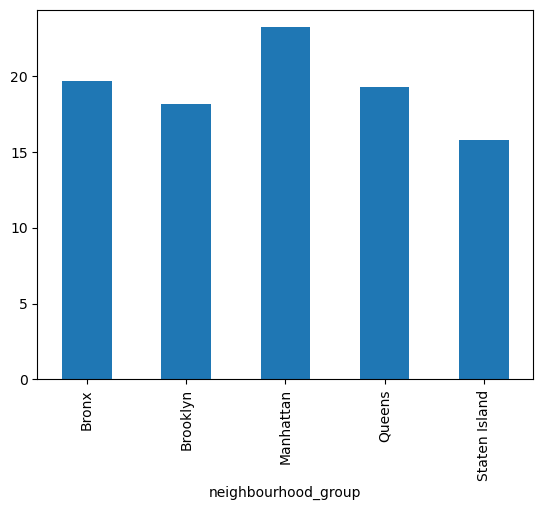

In [54]:
# Bar plot for visualisation
((df0.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb_df.groupby('neighbourhood_group').neighbourhood_group.count())*100).plot.bar()

In [55]:
# Average missing values
((df0.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb_df.groupby('neighbourhood_group').neighbourhood_group.count())*100).mean()

19.240898461107257

#### Observation:
Each neighbourhood_group has about 19 % missing values in 'last_review' feature.

In [56]:
df0.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,reviews_per_month_categories,calculated_host_listings_count_categories,availability_365_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,very High,Low,very Low,very High,very Low,very High
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249,very High,High,very Low,very High,Low,High
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0,High,Medium,very Low,very High,very Low,very Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365,Medium,very High,very Low,very High,very Low,very High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365,very High,very Low,very Low,very High,very Low,very High


In [58]:
# Count of 'room_type' with missing values
df1 = (df0.groupby('room_type').room_type.count()/airbnb_df.groupby('room_type').room_type.count())*100
df1

room_type
Entire home/apt    19.981109
Private room       20.877004
Shared room        27.068966
Name: room_type, dtype: float64

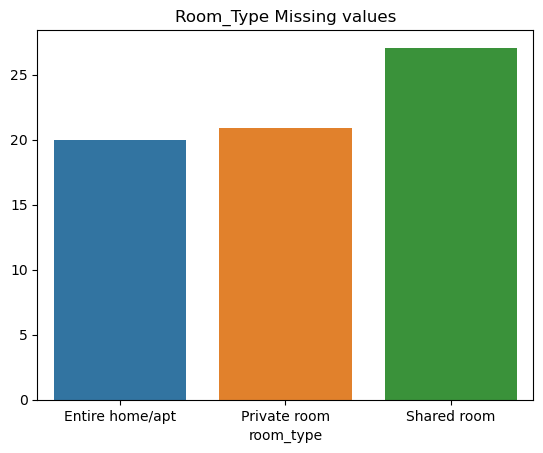

In [59]:
plt.title('Room_Type Missing values')
sns.barplot(x = df1.index, y = df1.values)
plt.show()

#### Observation:

'Shared room' has the highest missing value percentage (27 %) while other room types have only about 20 %.

In [60]:
# Calculating the mean and median of room price when reviews are given and missing

print('Mean and Median of prices with last_review missing')
print('Mean   = ', airbnb_df[airbnb_df['last_review'].isnull()].price.mean())
print('Median = ', airbnb_df[airbnb_df['last_review'].isnull()].price.median())

print('\nMean and Median of prices with last_review not missing')
print('Mean   = ', airbnb_df[airbnb_df['last_review'].notnull()].price.mean())
print('Median = ', airbnb_df[airbnb_df['last_review'].notnull()].price.median())

Mean and Median of prices with last_review missing
Mean   =  192.9190210903303
Median =  120.0

Mean and Median of prices with last_review not missing
Mean   =  142.317946605566
Median =  101.0


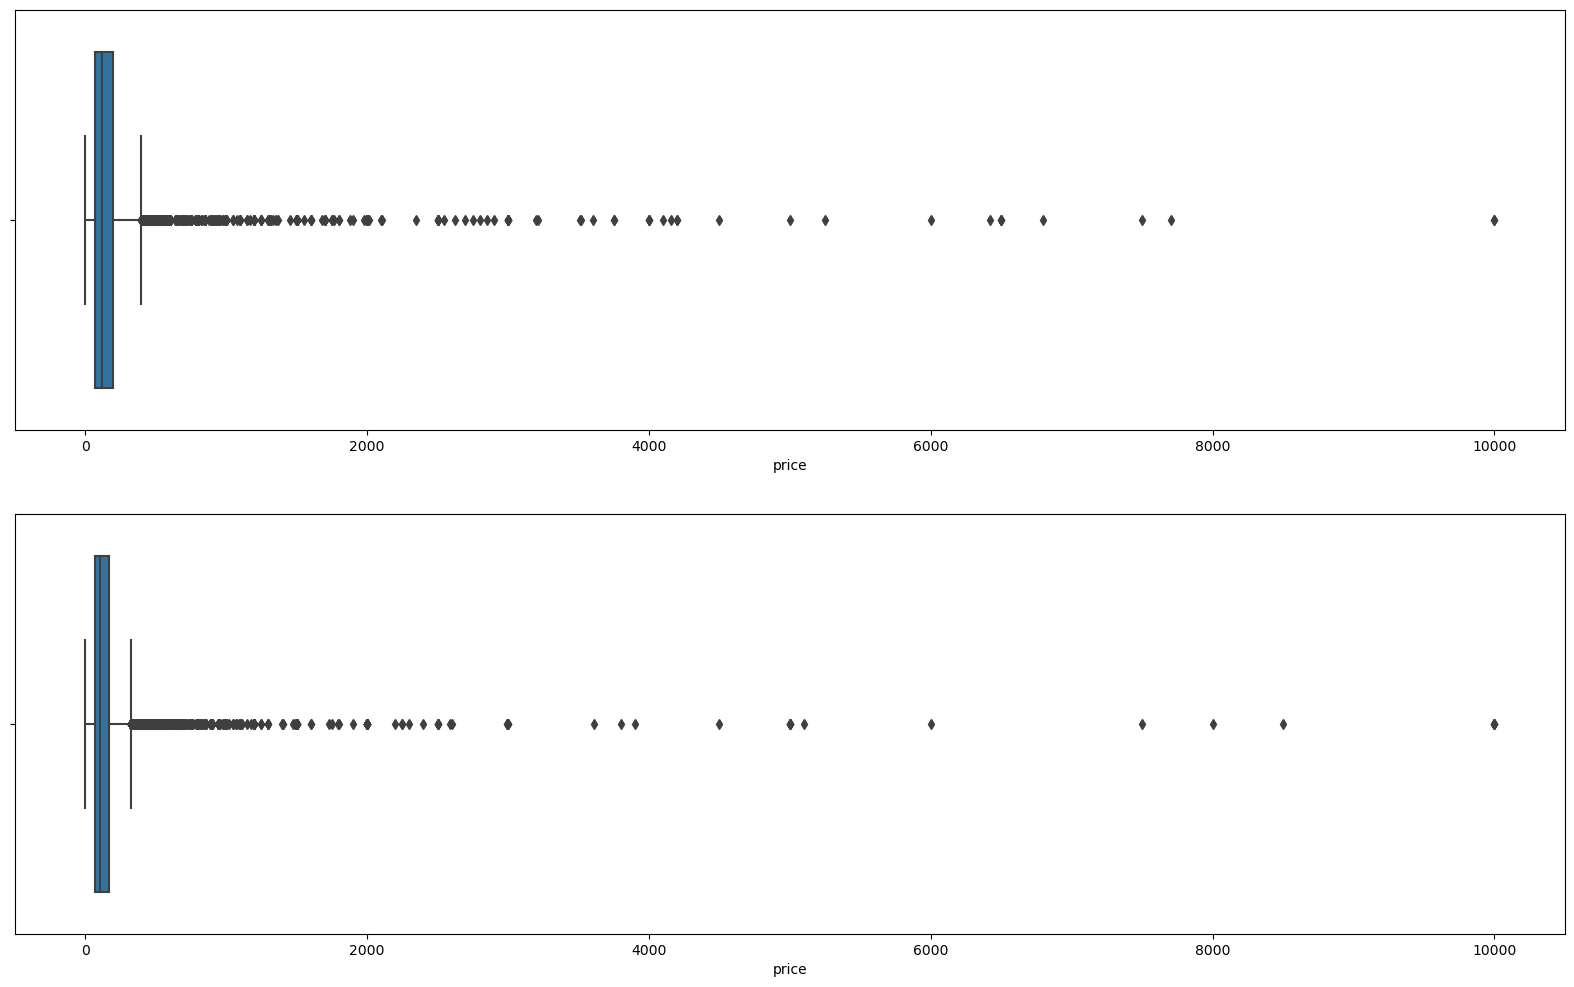

In [61]:
# Boxplot to view outliers for price with missing and not missing reviews
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
sns.boxplot(data = airbnb_df[airbnb_df['last_review'].isnull()] , x = 'price',  width= .8)

plt.subplot(2,1,2)
sns.boxplot(data = airbnb_df[airbnb_df['last_review'].notnull()] , x = 'price',  width= .8)

plt.show()

#### Conclusion:

1. The pricing is higher when 'last_review' is missing. 
2. Lesser reviews are given for shared rooms.
3. Higher room prices have more reviews.
4. Missing values are not at random

## Step 6: Univariate Analysis

In [62]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,reviews_per_month_categories,calculated_host_listings_count_categories,availability_365_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,very High,very Low,Medium,Medium,High,very High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,very High,very Low,High,Medium,Low,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,very High,Low,very Low,very High,very Low,very High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,High,very Low,very High,High,very Low,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,High,High,Medium,Medium,very Low,very Low


### 6.1 Analysis for column "name"

In [63]:
airbnb_df.name.value_counts()

name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47896, dtype: int64

### 6.2 Analysis for column "host_id"

In [64]:
airbnb_df.host_id.value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64

### 6.3 Analysis for column "host_name"

In [65]:
airbnb_df.host_name.value_counts()

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64

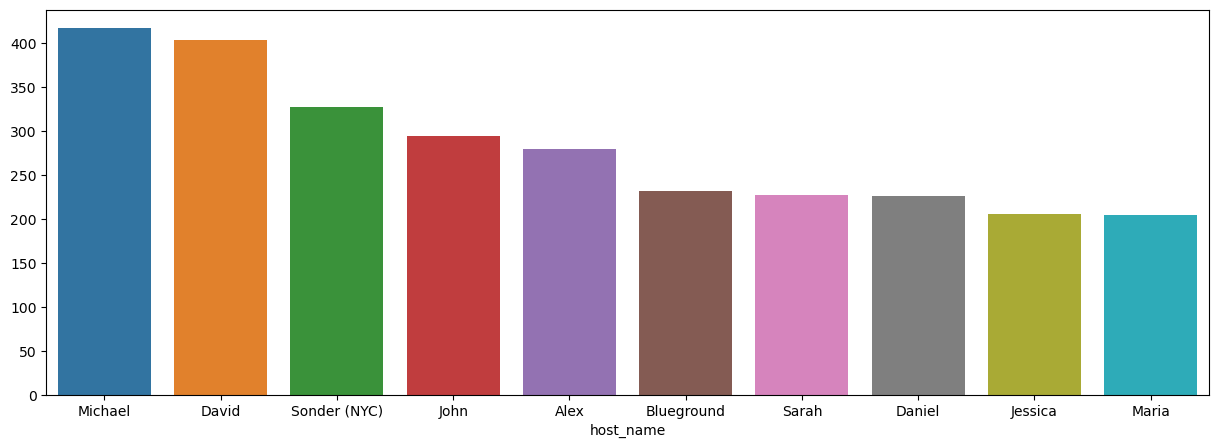

In [66]:
# Top 10 hosts
plt.figure(figsize=(15,5))
sns.barplot(x = airbnb_df.host_name.value_counts().index[:10] , y = airbnb_df.host_name.value_counts().values[:10])
plt.show()

### 6.4 Analysis for column "neighbourhood_group"

In [67]:
airbnb_df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [68]:
# Percentage
airbnb_df.neighbourhood_group.value_counts(normalize= True) * 100

neighbourhood_group
Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: proportion, dtype: float64

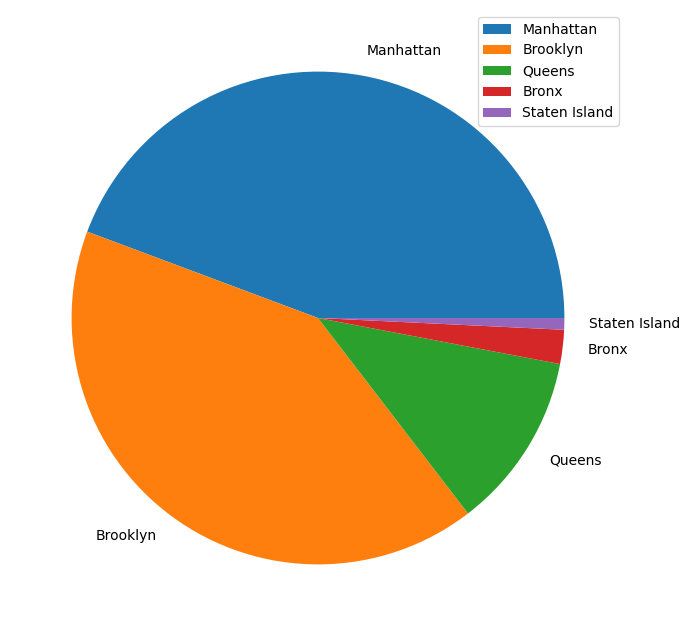

In [69]:
# Pie chart for visualisation
plt.figure(figsize=(8,8))
plt.pie(x = airbnb_df.neighbourhood_group.value_counts(normalize= True) * 100,labels = airbnb_df.neighbourhood_group.value_counts(normalize= True).index)
plt.legend()
plt.show()

#### Observation:

85% of the listing are Manhattan and Brooklyn neighbourhood_group

### 6.5 Analysis for column "neighbourhood"

In [70]:
airbnb_df.neighbourhood.value_counts()

neighbourhood
Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgew

### 6.6 Analysis for column "room_type"

In [71]:
airbnb_df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [72]:
airbnb_df.room_type.value_counts(normalize=True)*100

room_type
Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: proportion, dtype: float64

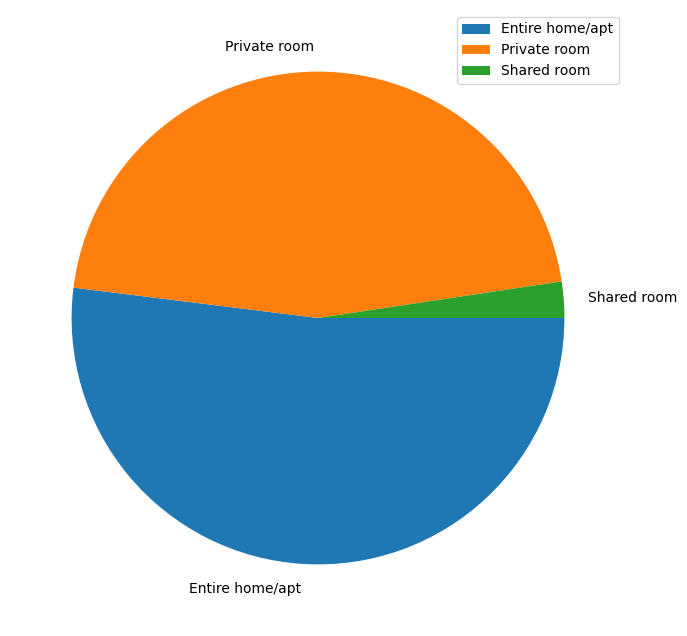

In [73]:
plt.figure(figsize=(8,8))
plt.pie(x = airbnb_df.room_type.value_counts(normalize= True) * 100,labels = airbnb_df.room_type.value_counts(normalize= True).index,counterclock=False)
plt.legend()
plt.show()

#### Observation:
97% of the bookings are for private or entire home/apt suggesting customers prefer privacy

### 6.7 Analysis for column "price"

In [74]:
airbnb_df.price.value_counts()

price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

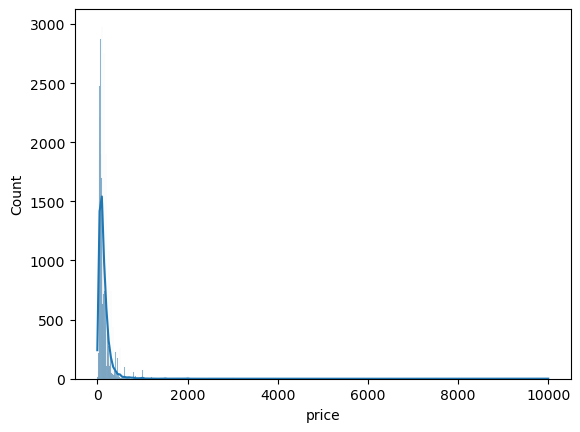

In [75]:
sns.histplot(data = airbnb_df.price,kde = True)

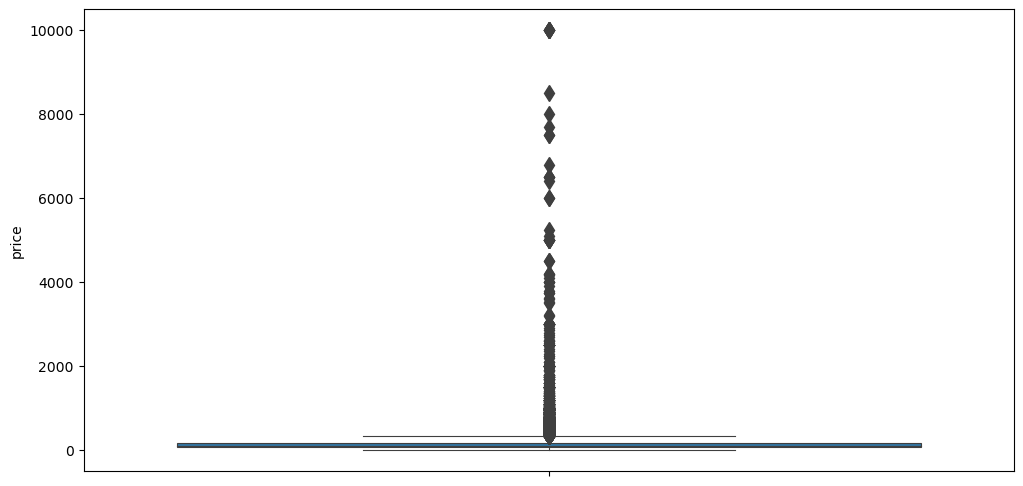

In [76]:
plt.figure(figsize=(12,6))
sns.boxplot(y = airbnb_df.price,width=0.8,
    dodge=True,
    fliersize=8,
    linewidth=.8,
    color=None)
plt.show()

### 6.8 Analysis for column "minimum_nights"

In [77]:
airbnb_df.minimum_nights.value_counts()

minimum_nights
1       12720
2       11696
3        7999
30       3760
4        3303
5        3034
7        2058
6         752
14        562
10        483
29        340
15        279
20        223
28        203
31        201
21        135
8         130
60        106
90        104
12         91
25         82
9          80
13         54
180        43
11         33
45         32
365        29
120        28
18         28
16         18
27         17
26         16
100        15
35         15
24         14
17         14
50         14
40         13
80          9
19          8
32          8
22          8
23          8
70          8
59          6
300         6
150         6
360         5
500         5
200         4
75          4
55          4
999         3
62          3
91          3
110         3
240         3
93          2
160         2
47          2
88          2
105         2
33          2
53          2
115         2
181         2
210         2
270         2
44          2
133         2
56   

In [78]:
airbnb_df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

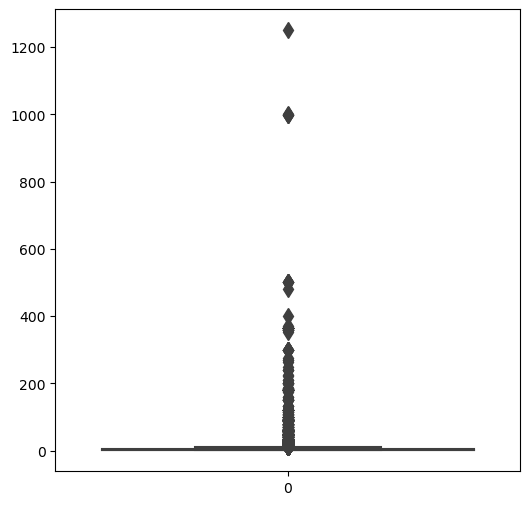

In [79]:
plt.figure(figsize=(6,6))
sns.boxplot(data = airbnb_df.minimum_nights,fliersize=8)
plt.show()

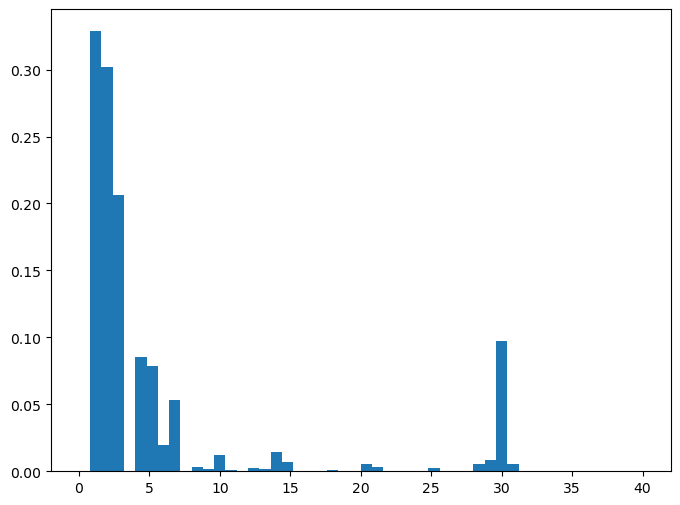

In [80]:
plt.figure(figsize=(8,6))
plt.hist(data = airbnb_df, x = 'minimum_nights',bins=50,range=(0,40),density=True)
plt.show()

### 6.9 Analysis for column "number_of_reviews"

In [81]:
airbnb_df.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

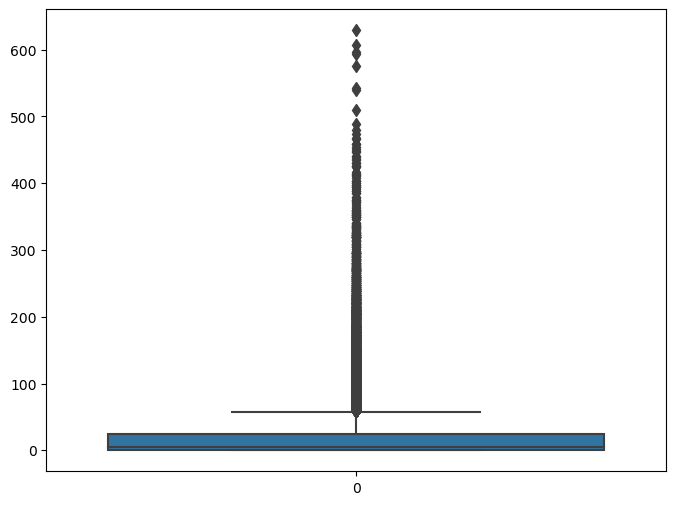

In [82]:
plt.figure(figsize=(8,6))
sns.boxplot(data = airbnb_df.number_of_reviews,fliersize=6)
plt.show()

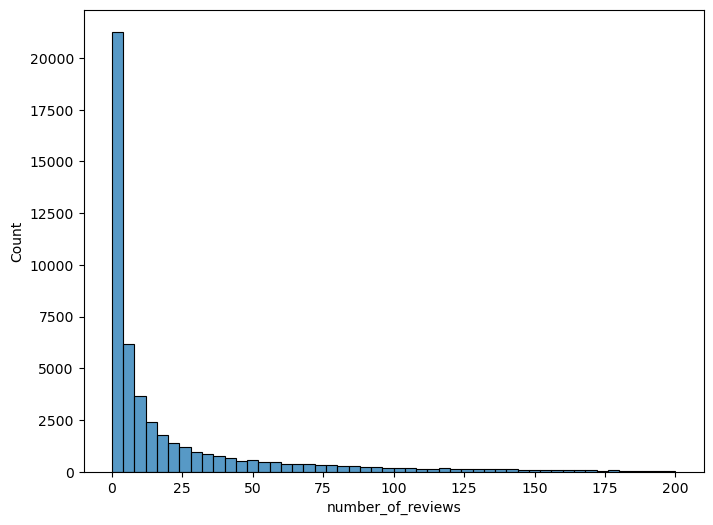

In [83]:
plt.figure(figsize = (8,6))
sns.histplot(data = airbnb_df, x = 'number_of_reviews',bins=50,binrange=(0,200))
plt.show()

### 6.10 Analysis for column "reviews_per_month"

In [84]:
airbnb_df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

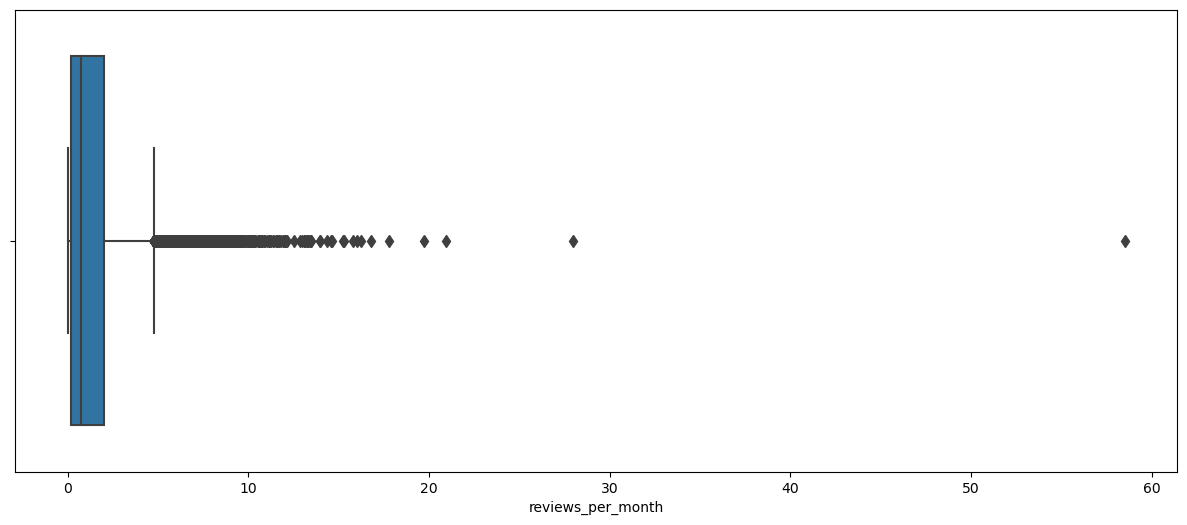

In [85]:
plt.figure(figsize = (15,6))
sns.boxplot(data = airbnb_df , x = 'reviews_per_month',fliersize=6)
plt.show()

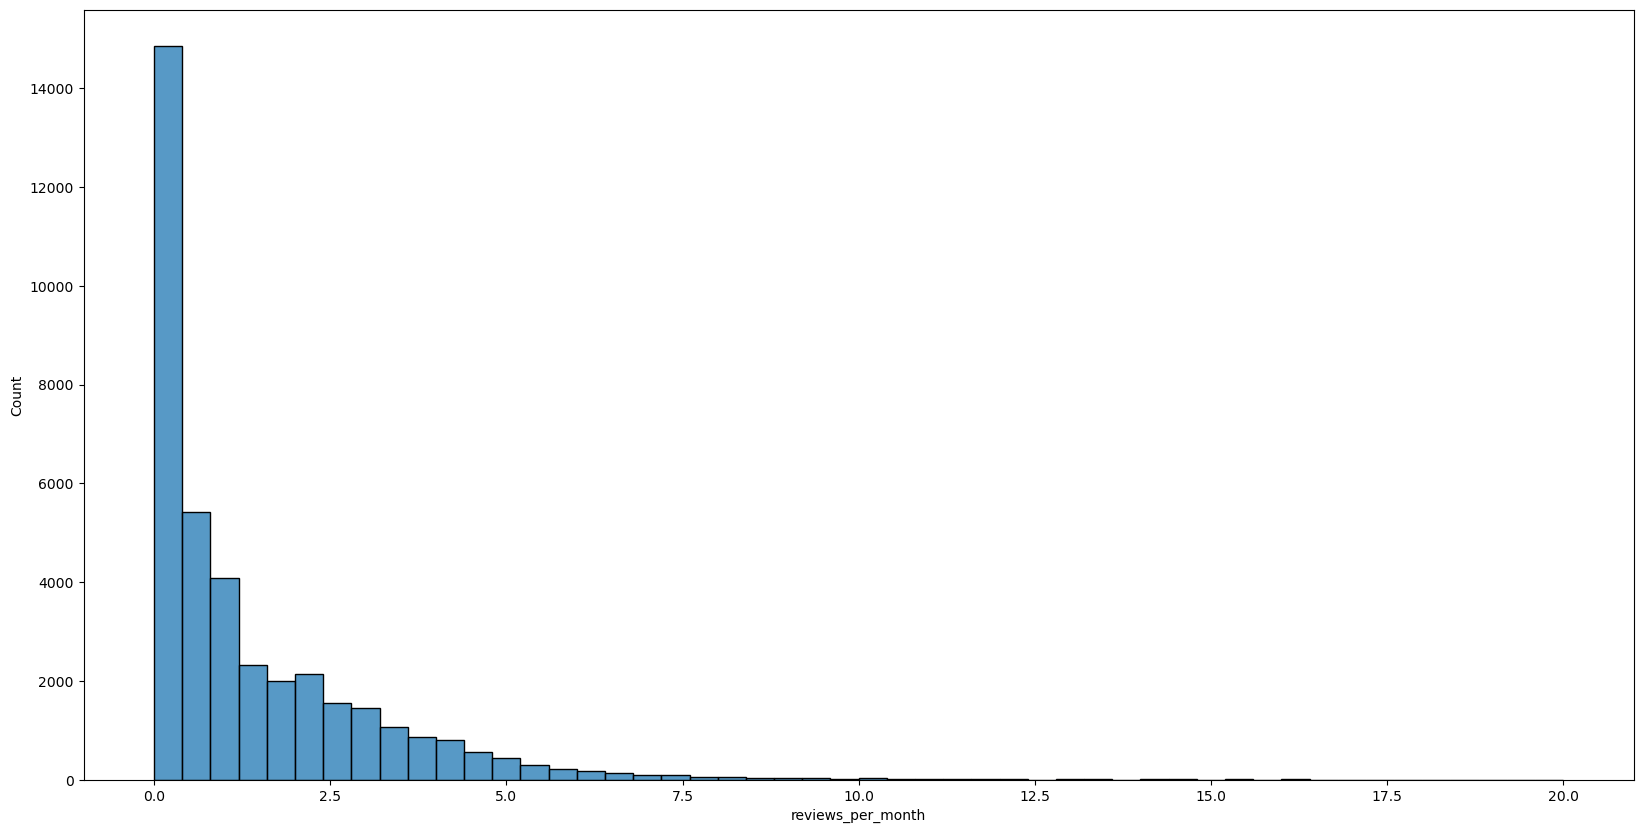

In [86]:
plt.figure(figsize = (20,10))
sns.histplot(data = airbnb_df, x = 'reviews_per_month',bins=50,binrange=(0,20))
plt.show()

In [87]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,reviews_per_month_categories,calculated_host_listings_count_categories,availability_365_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,very High,very Low,Medium,Medium,High,very High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,very High,very Low,High,Medium,Low,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,very High,Low,very Low,very High,very Low,very High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,High,very Low,very High,High,very Low,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,High,High,Medium,Medium,very Low,very Low


### 6.11 Analysis for column "calculated_host_listings_count"

In [88]:
airbnb_df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

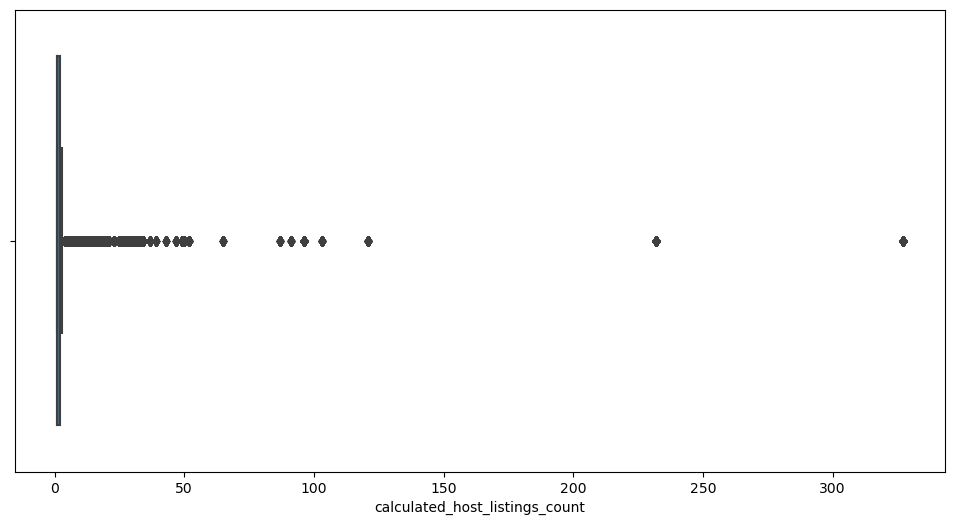

In [93]:
plt.figure(figsize = (12,6))
sns.boxplot(data = airbnb_df , x = 'calculated_host_listings_count',fliersize=5)
plt.show()

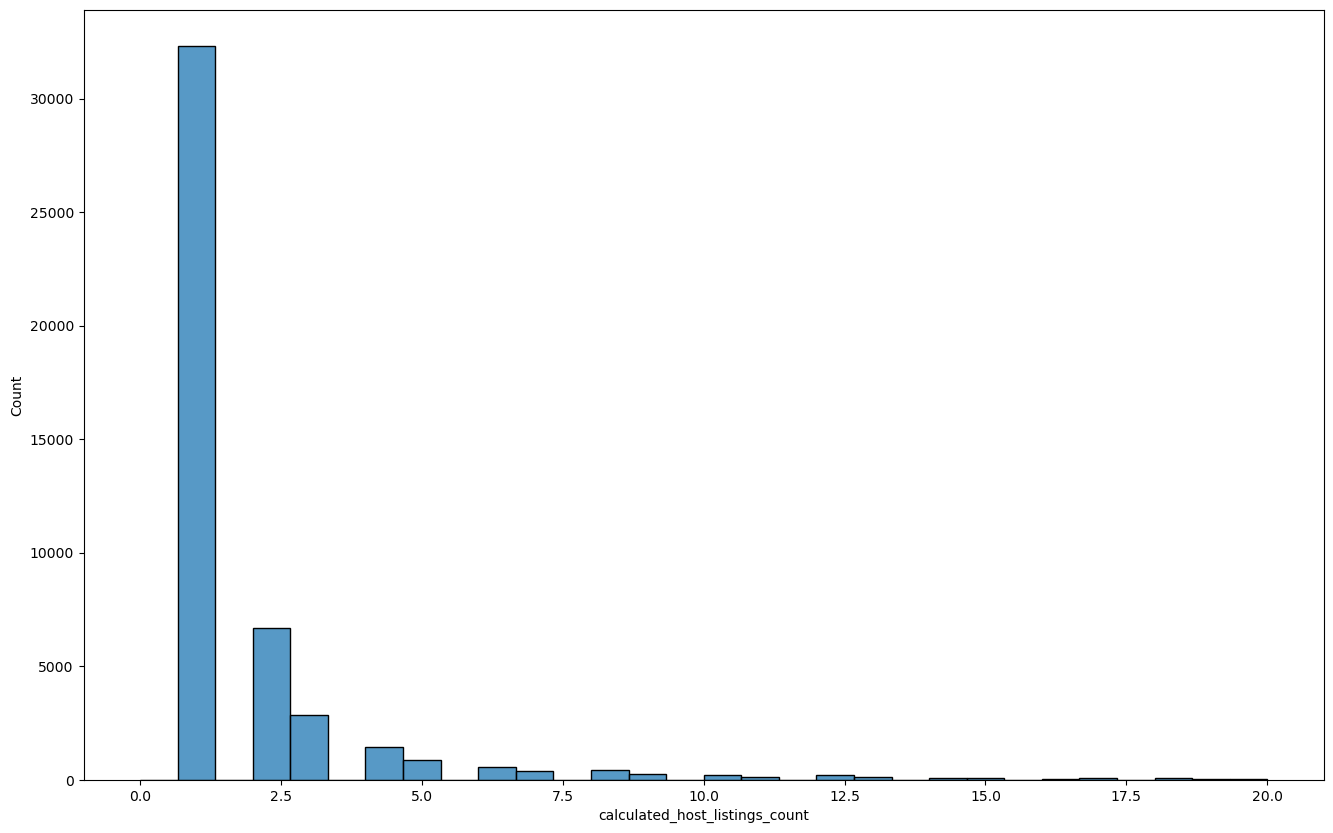

In [94]:
plt.figure(figsize = (16,10))
sns.histplot(data = airbnb_df, x = 'calculated_host_listings_count',bins=30,binrange=(0,20))
plt.show()

### 6.12 Analysis for column "availability_365"

In [95]:
airbnb_df.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

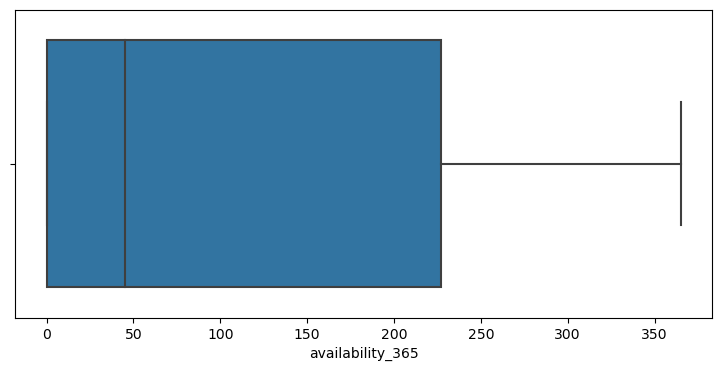

In [97]:
plt.figure(figsize = (9,4))
sns.boxplot(data = airbnb_df , x = 'availability_365')
plt.show()

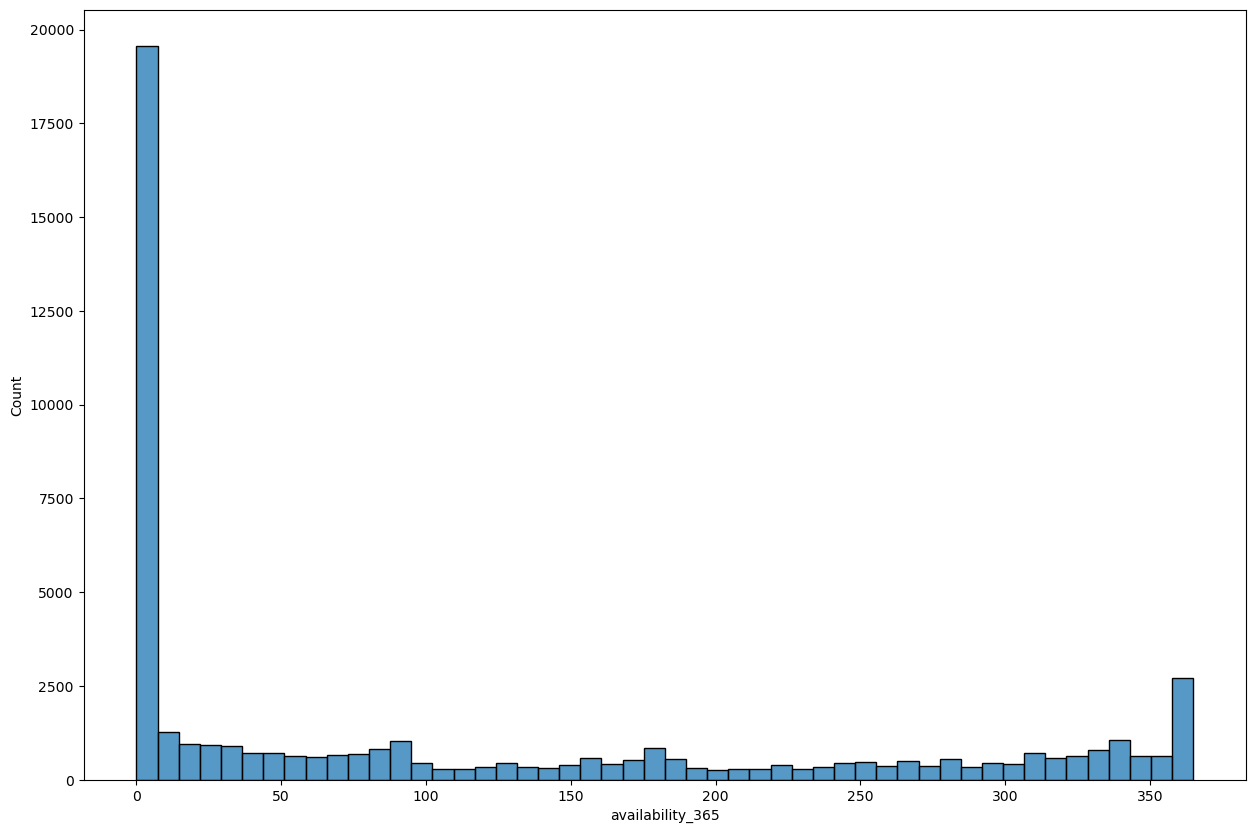

In [98]:
plt.figure(figsize = (15,10))
sns.histplot(data = airbnb_df, x = 'availability_365',bins=50,binrange=(0,365))
plt.show()

### 6.13 Analysis for column "minimum_night_categories"

In [100]:
airbnb_df.minimum_night_categories.value_counts(normalize= True)*100

minimum_night_categories
Low          40.280192
very Low     26.014930
very High    13.580121
Medium       12.960425
High          7.164332
Name: proportion, dtype: float64

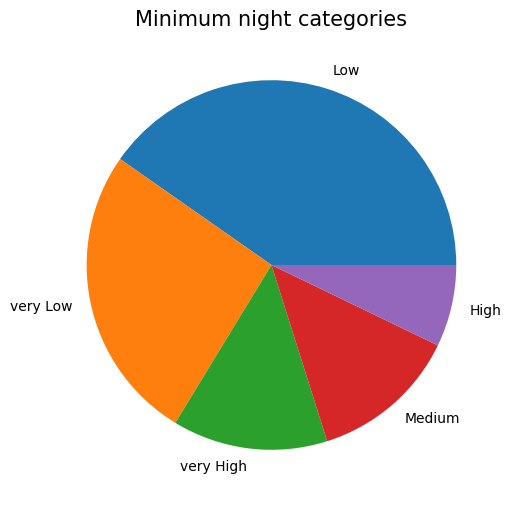

In [101]:
plt.figure(figsize=(12,6))
plt.title('Minimum night categories', fontdict={'fontsize': 15})
plt.pie(x = airbnb_df.minimum_night_categories.value_counts(),labels=airbnb_df.minimum_night_categories.value_counts().index)
plt.show()

### 6.14 Analysis for column "number_of_reviews_categories"

In [103]:
airbnb_df.number_of_reviews_categories.value_counts()

number_of_reviews_categories
very Low     15296
Low           9597
Medium        8612
High          8431
very High     6959
Name: count, dtype: int64

In [104]:
airbnb_df.number_of_reviews_categories.value_counts(normalize=True)*100

number_of_reviews_categories
very Low     31.283362
Low          19.627774
Medium       17.613253
High         17.243072
very High    14.232539
Name: proportion, dtype: float64

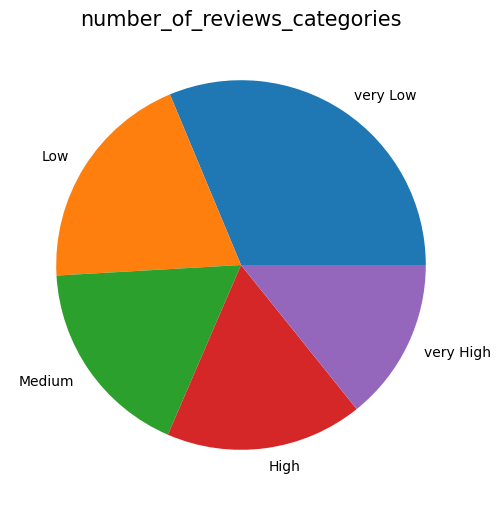

In [105]:
plt.figure(figsize=(12,6))
plt.title('number_of_reviews_categories', fontdict={'fontsize': 15})
plt.pie(x = airbnb_df.number_of_reviews_categories.value_counts(),labels=airbnb_df.number_of_reviews_categories.value_counts().index)
plt.show()

### 6.15 Analysis for column "price_categories"

In [106]:
airbnb_df['price_categories'].value_counts()

price_categories
very High    24967
High         17367
Medium        6474
Low             59
very Low        28
Name: count, dtype: int64

In [107]:
airbnb_df['price_categories'].value_counts(normalize=True)*100

price_categories
very High    51.062481
High         35.518969
Medium       13.240618
Low           0.120667
very Low      0.057266
Name: proportion, dtype: float64

In [108]:
airbnb_df['price_categories'].describe()

count         48895
unique            5
top       very High
freq          24967
Name: price_categories, dtype: object

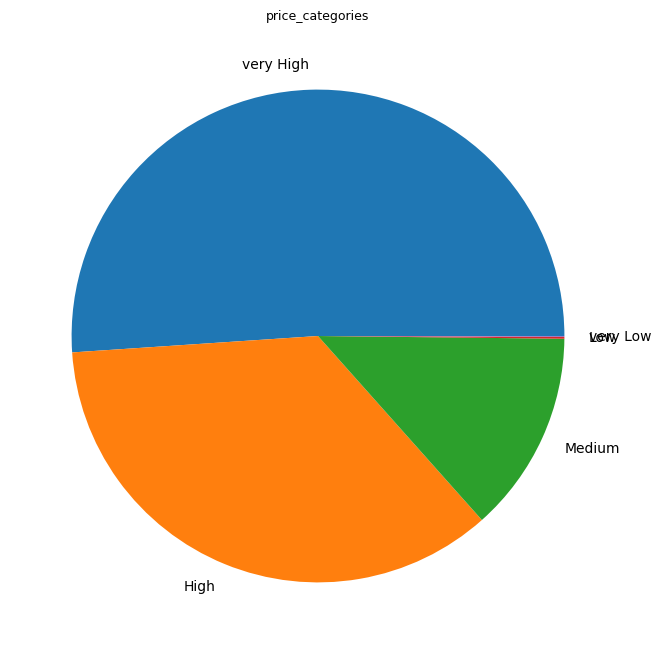

In [113]:
plt.figure(figsize=(16,8))
plt.title('price_categories', fontdict={'fontsize': 9})
plt.pie(x = airbnb_df.price_categories.value_counts(),labels=airbnb_df.price_categories.value_counts().index)
plt.show()


## Step 7: Bivariate and Multivariate Analysis

### 7.1 Finding correalations

In [115]:
airbnb_df[num_cols].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [116]:
airbnb_df[num_cols].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


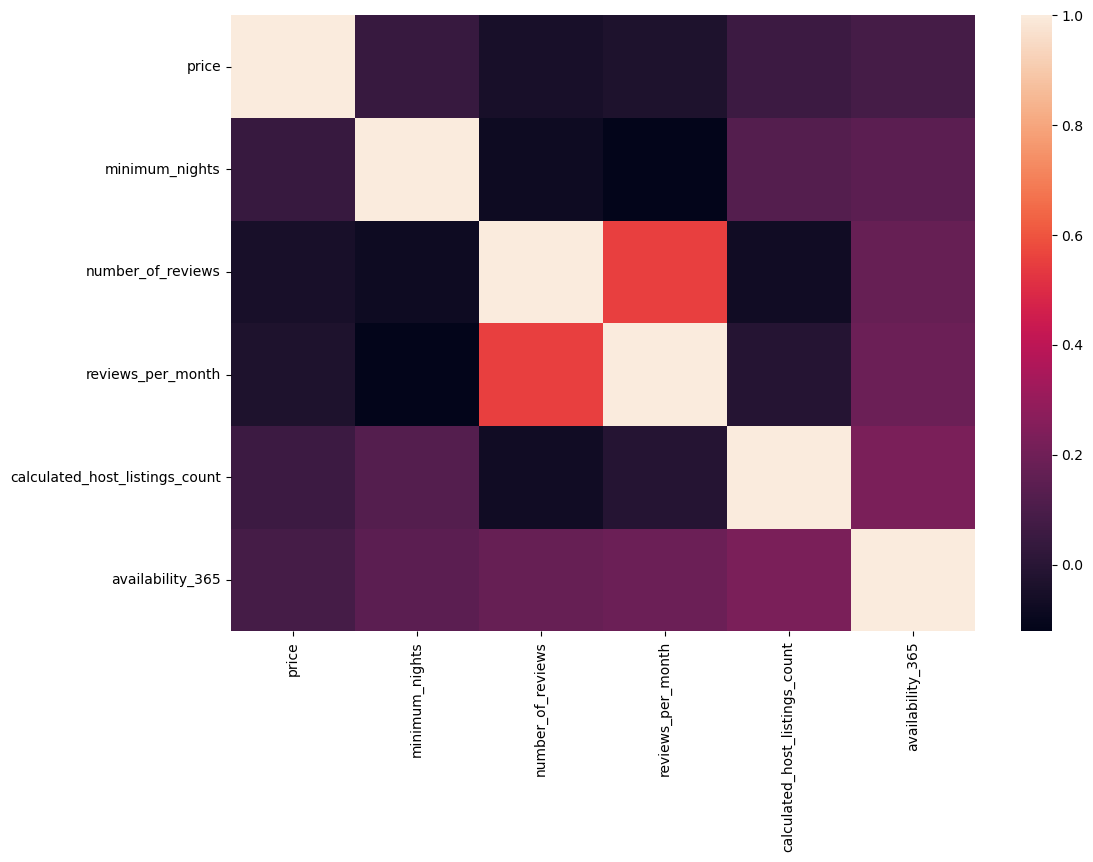

In [118]:
plt.figure(figsize=(12,8))
sns.heatmap(data = airbnb_df[num_cols].corr())
plt.show()

### 7.2 Finding Top correlations

In [119]:
corr_matrix = airbnb_df[num_cols].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False))

In [120]:
corr_matrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,0.047954,0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,0.080116,0.121702,0.127960,0.144303
number_of_reviews,0.047954,0.080116,1.000000,0.549868,0.072376,0.172028
reviews_per_month,0.030608,0.121702,0.549868,1.000000,0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,0.072376,0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [121]:
sol

number_of_reviews               reviews_per_month                 0.549868
calculated_host_listings_count  availability_365                  0.225701
reviews_per_month               availability_365                  0.185791
number_of_reviews               availability_365                  0.172028
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.121702
price                           availability_365                  0.081829
minimum_nights                  number_of_reviews                 0.080116
number_of_reviews               calculated_host_listings_count    0.072376
price                           calculated_host_listings_count    0.057472
                                number_of_reviews                 0.047954
                                minimum_nights                    0.042799
                         

In [125]:
# Top 10 correlations
sol[0:9]

number_of_reviews               reviews_per_month                 0.549868
calculated_host_listings_count  availability_365                  0.225701
reviews_per_month               availability_365                  0.185791
number_of_reviews               availability_365                  0.172028
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.121702
price                           availability_365                  0.081829
minimum_nights                  number_of_reviews                 0.080116
dtype: float64

### 7.3 Analysis for number_of_reviews_categories and prices

In [126]:
# prices for each of reviews_categories
x1 = airbnb_df.groupby('number_of_reviews_categories').price.sum().sort_values(ascending = False)
x1

number_of_reviews_categories
very Low     2722793
Low          1420309
Medium       1257205
High         1171295
very High     895676
Name: price, dtype: int64

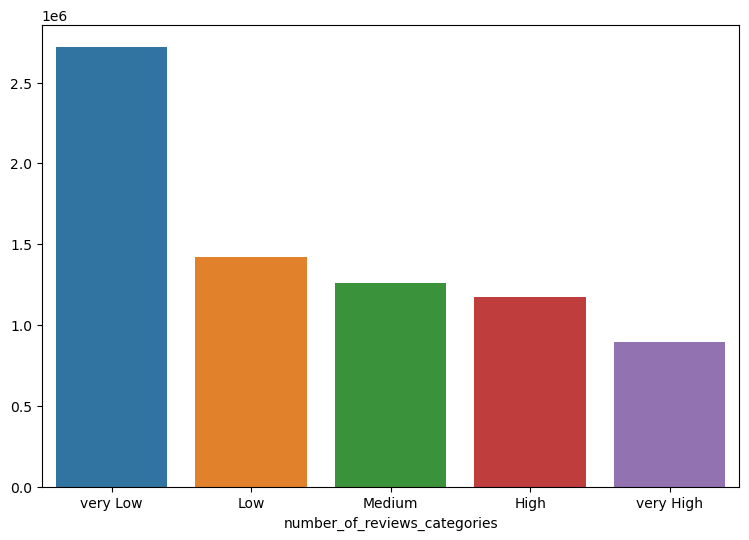

In [127]:
plt.figure(figsize=(9,6))
sns.barplot(x = x1.index,y = x1.values)
plt.show()

<Axes: xlabel='number_of_reviews_categories', ylabel='price'>

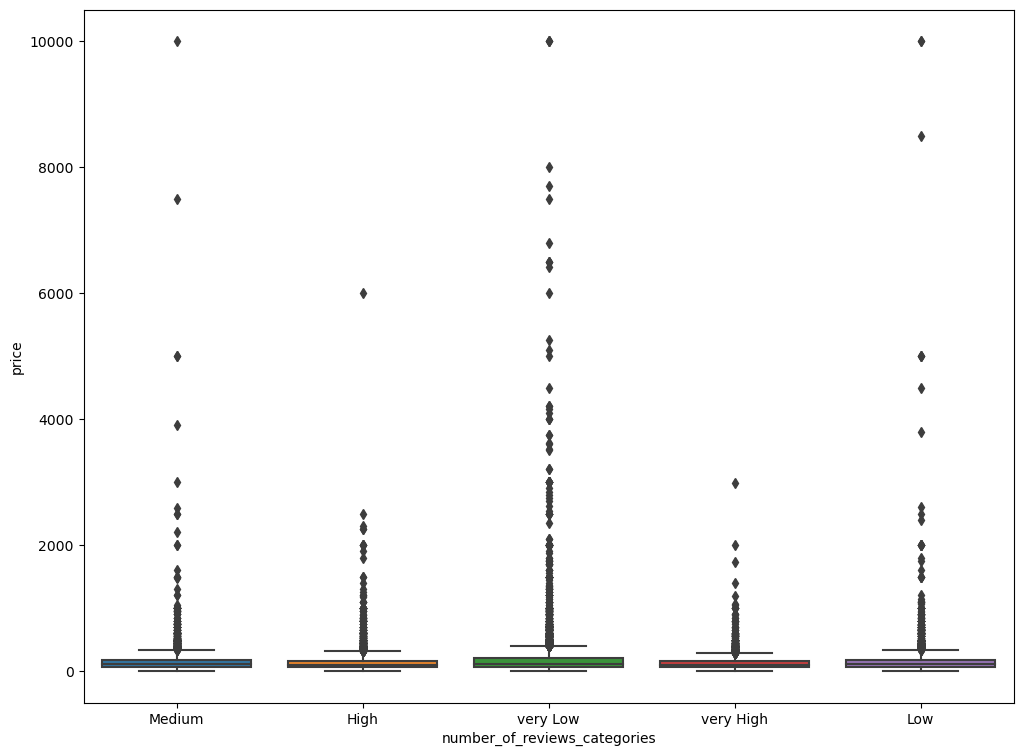

In [130]:
plt.figure(figsize=(12,9))
sns.boxplot(x = airbnb_df.number_of_reviews_categories , y = airbnb_df.price)

In [131]:
airbnb_df.groupby('number_of_reviews_categories').price.mean().sort_values()

number_of_reviews_categories
very High    128.707573
High         138.927174
Medium       145.982931
Low          147.995103
very Low     178.006865
Name: price, dtype: float64

In [132]:
airbnb_df.groupby('number_of_reviews_categories').price.median().sort_values()

number_of_reviews_categories
High         100.0
very High    100.0
Low          105.0
Medium       109.0
very Low     115.0
Name: price, dtype: float64

In [133]:
x2 = pd.DataFrame(x1)
x2 = x2.reset_index()
x2

,number_of_reviews_categories,price
0,very Low,2722793
1,Low,1420309
2,Medium,1257205
3,High,1171295
4,very High,895676


In [134]:
((x2.groupby('number_of_reviews_categories').price.sum()/x2.price.sum())*100).sort_values(ascending = True)

number_of_reviews_categories
very High    11.994679
High         15.685702
Medium       16.836189
Low          19.020438
very Low     36.462992
Name: price, dtype: float64

#### Conclusion:

Low and very low price categories have higher reviews.

### 7.4 Analysis for "room_type" and  "number_of_reviews_categories"

In [135]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,reviews_per_month_categories,calculated_host_listings_count_categories,availability_365_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,very High,very Low,Medium,Medium,High,very High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,very High,very Low,High,Medium,Low,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,very High,Low,very Low,very High,very Low,very High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,High,very Low,very High,High,very Low,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,High,High,Medium,Medium,very Low,very Low


In [136]:
airbnb_df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [137]:
pd.crosstab(airbnb_df['room_type'], airbnb_df['number_of_reviews_categories'])

number_of_reviews_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,4287,5177,4704,3611,7630
Private room,3954,4213,3708,3236,7215
Shared room,190,207,200,112,451


In [138]:
airbnb_df.groupby('room_type').number_of_reviews.sum() 

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [139]:
airbnb_df.groupby('room_type').number_of_reviews.sum()/airbnb_df.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

#### Conclusion:

1. Entire home/apt and Private rooms have more reviews than Shared rooms suggesting these rooms will have better chances for booking

### 7.5  Analysis for "room_type" and "price_categories"

In [140]:
pd.crosstab(airbnb_df['room_type'], airbnb_df['price_categories'])

price_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,4384,11,170,20835,9
Private room,12614,16,5677,4004,15
Shared room,369,32,627,128,4


#### Conclusion:

1. Entire home/apt with high and very high price categories have higher bookings.
2. Private rooms with higher price range have more bookings.
3. Shared rooms under low to mid price category have more bookings suggesting customers do not spend highly on pricy shared rooms

### 7.6 Analysis for "room_type" and "reviews_per_month"

In [141]:
airbnb_df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [142]:
airbnb_df.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    1.306578
Private room       1.445209
Shared room        1.471726
Name: reviews_per_month, dtype: float64

In [143]:
airbnb_df.groupby('room_type').reviews_per_month.median()

room_type
Entire home/apt    0.66
Private room       0.77
Shared room        0.98
Name: reviews_per_month, dtype: float64

In [144]:
airbnb_df.groupby('room_type').reviews_per_month.sum()

room_type
Entire home/apt    26565.34
Private room       25529.62
Shared room         1245.08
Name: reviews_per_month, dtype: float64

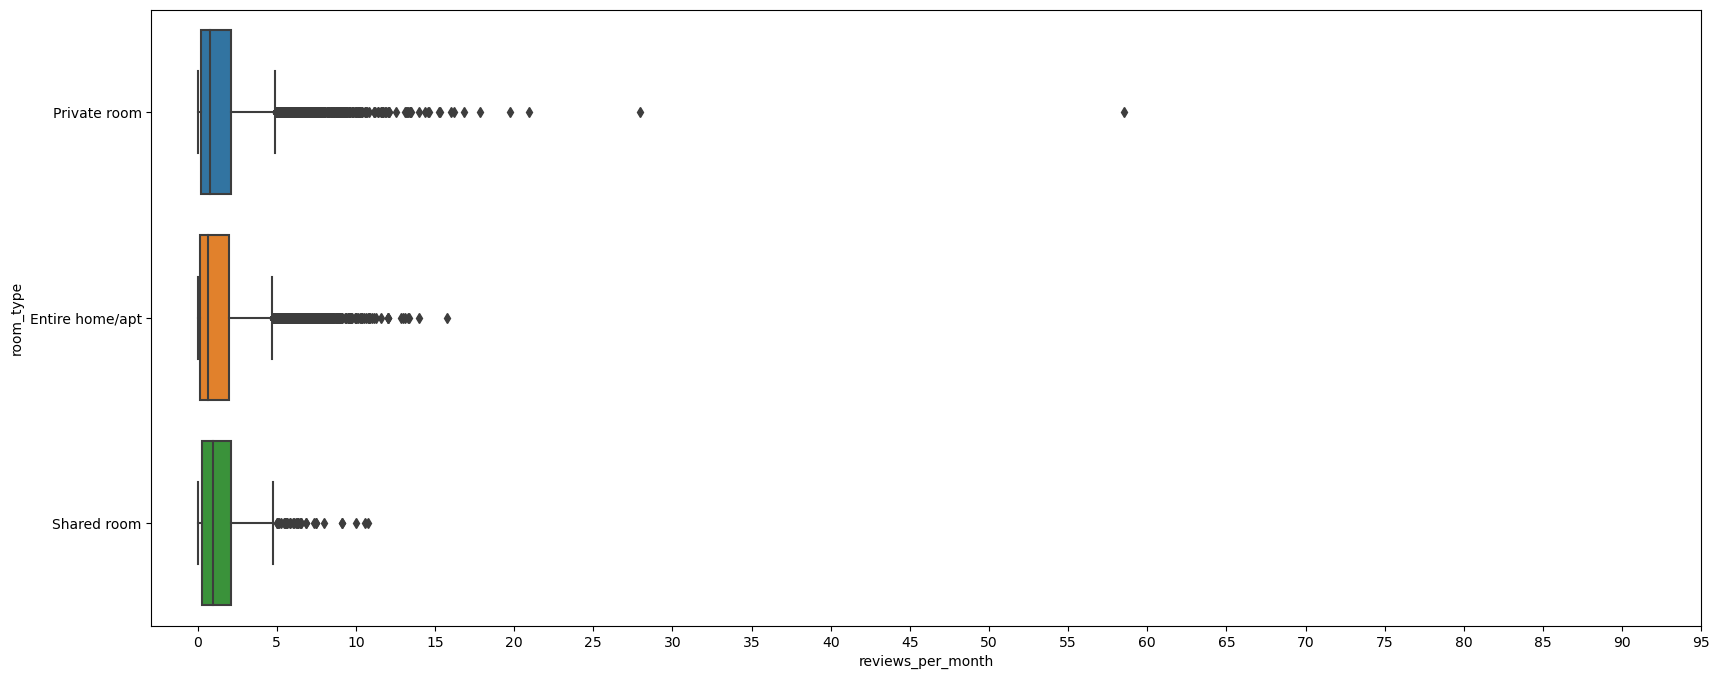

In [150]:
plt.figure(figsize=(20,8))
sns.boxplot(data = airbnb_df, y = 'room_type' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,5))
plt.show()

#### Conclusion:

1. For each 'room_type' there are  approx. 1.4 reviews per month on average.
2. Shared rooms have lesser overall reviews

### 7.7 Analysis for "minimum_night_categories" and "reviews_per_month"

In [151]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,reviews_per_month_categories,calculated_host_listings_count_categories,availability_365_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,very High,very Low,Medium,Medium,High,very High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,very High,very Low,High,Medium,Low,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,very High,Low,very Low,very High,very Low,very High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,High,very Low,very High,High,very Low,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,High,High,Medium,Medium,very Low,very Low


In [152]:
airbnb_df.groupby('minimum_night_categories').reviews_per_month.sum().sort_values()

minimum_night_categories
High          1447.01
very High     2015.75
Medium        4689.73
very Low     20395.49
Low          24792.06
Name: reviews_per_month, dtype: float64

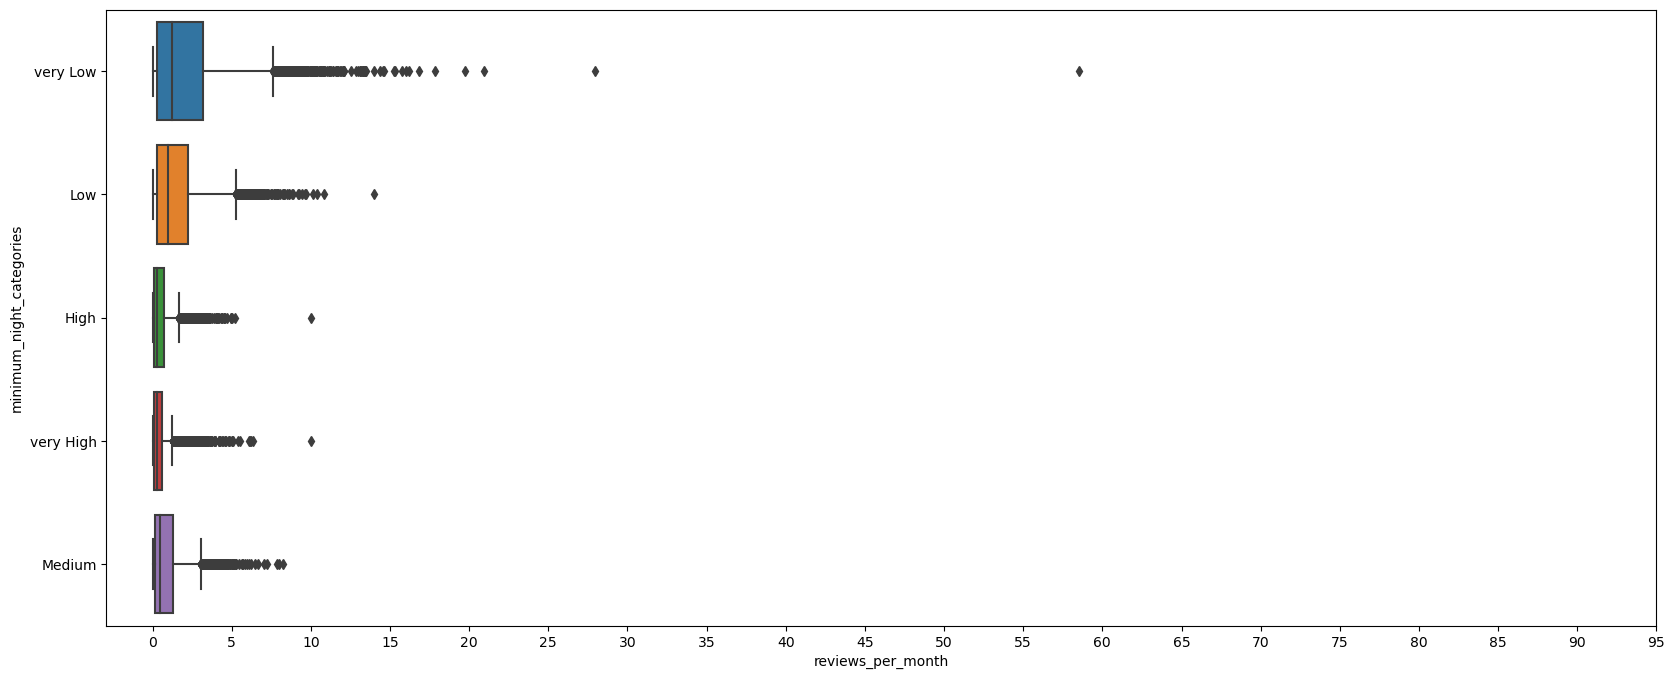

In [154]:
plt.figure(figsize=(20,8))
sns.boxplot(data = airbnb_df, y = 'minimum_night_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,5))
plt.show()

#### Conclusion:

1. Customer's leave more number of reviews for low number of minimum nights.
2. minimum_nights should be on the lower side to attract more customers.

### 7.8 Analysis for "availability_365_categories", "price_categories" and "reviews_per_month"

In [155]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,reviews_per_month_categories,calculated_host_listings_count_categories,availability_365_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,very High,very Low,Medium,Medium,High,very High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,very High,very Low,High,Medium,Low,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,very High,Low,very Low,very High,very Low,very High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,High,very Low,very High,High,very Low,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,High,High,Medium,Medium,very Low,very Low


In [156]:
airbnb_df.availability_365_categories.value_counts()

availability_365_categories
very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: count, dtype: int64

In [157]:
pd.DataFrame(airbnb_df.groupby(['availability_365_categories','price_categories']).reviews_per_month.mean())

reviews_per_month
availability_365_categories price_categories                   
High                        High                       2.098447
                            Low                        1.746667
                            Medium                     1.779742
                            very High                  2.087514
                            very Low                   3.466667
Low                         High                       2.084674
                            Low                        2.956000
                            Medium                     2.086022
                            very High                  1.613707
                            very Low                   1.772000
Medium                      High                       2.130216
                            Low                        1.252000
                            Medium                     2.101637
                            very High                  1.878950
                            very Low                   1.877500
very High                   High                       1.642058
                            Low                        0.531667
                            Medium                     1.570864
                            very High                  1.219249
                            very Low                   0.935000
very Low                    High                       0.556875
                            Low                        0.550833
                            Medium                     0.497924
                            very High                  0.454642
                            very Low                   0.552500

#### Conclusion:

1. If the combination of availability and price is very high, reviews_per_month will be low on average.
2. Very high availability and very low price are likely to get more reviews.
3. Lower categories for availability and price will get lesser reviews.

In [158]:
airbnb_df.to_csv('AB_NYC_2019_analysed.csv')